# <font color='maroon'>Generic Sklearn Discriminators</font>

In [1]:
%matplotlib inline

In [2]:
# Add path for pop_kernels package
import sys
sys.path.insert(0, "..")

In [3]:
import pickle
from copy import deepcopy

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import qiskit.tools.jupyter
from qiskit.ignis.measurement.discriminator.iq_discriminators import (
    LinearIQDiscriminator,
    QuadraticIQDiscriminator,
)
from qiskit.result import Result

from pop_kernels import SklearnIQDiscriminator
from sklearn.svm import SVC

plt.rcParams['font.size'] = 14

qiskit.__qiskit_version__

{'qiskit-terra': '0.11.0',
 'qiskit-aer': '0.3.4',
 'qiskit-ignis': '0.3.0',
 'qiskit-ibmq-provider': '0.4.4',
 'qiskit-aqua': '0.6.1',
 'qiskit': '0.14.0'}

In [4]:
q = 0
qubits = [q]

In [5]:
with open('ibmq_armonk_results.pickle', 'rb') as handle:
    res = pickle.load(handle)
result = Result.from_dict(res)

In [6]:
len(result.results)

3

In [7]:
discriminators = [
    SklearnIQDiscriminator(SVC(C=C, kernel="rbf", gamma='scale'), result, [q], ['0', '1'])
    for C in [1.0, 1.5, 3.0, 5.0, 10.0, 20.0, 30.0, 40.0]
]

In [8]:
def misclassifications(dscr):
    """ Return the list of misclassified IQ values. """
    x_data = np.array(dscr._xdata)
    y_data = np.array(dscr._ydata)
    y_disc = np.array(dscr.discriminate(dscr._xdata))
    misclassified = x_data[y_disc != y_data]
    return misclassified

In [9]:
dscr = discriminators[0]
x_data = np.array(dscr._xdata)
y_data = np.array(dscr._ydata)
y_disc = np.array(dscr.discriminate(dscr._xdata))
misclassified = x_data[y_disc != y_data]

In [10]:
y_data


array(['0', '0', '0', ..., '1', '1', '1'], dtype='<U1')

In [11]:
df_errors = pd.DataFrame([
    {"classifier": str(d._classifier), "C": d._classifier.C, "errors": len(misclassifications(d))}
    for d in discriminators
])
df_errors.sort_values("C", inplace=True)
df_errors

,classifier,C,errors
0,"SVC(C=1.0, cache_size=200, class_weight=None, ...",1.0,43
1,"SVC(C=1.5, cache_size=200, class_weight=None, ...",1.5,42
2,"SVC(C=3.0, cache_size=200, class_weight=None, ...",3.0,42
3,"SVC(C=5.0, cache_size=200, class_weight=None, ...",5.0,42
4,"SVC(C=10.0, cache_size=200, class_weight=None,...",10.0,41
5,"SVC(C=20.0, cache_size=200, class_weight=None,...",20.0,41
6,"SVC(C=30.0, cache_size=200, class_weight=None,...",30.0,41
7,"SVC(C=40.0, cache_size=200, class_weight=None,...",40.0,41


In [12]:
len(discriminators[0]._xdata)

1024

In [13]:
misclassifications(discriminators[0])

array([[-6.76135854e+10,  9.96867277e+09],
       [-5.15724001e+10,  1.90269030e+10],
       [-5.64838072e+10,  3.07997204e+10],
       [-4.79111741e+10,  4.03937567e+10],
       [-4.41388483e+10,  3.25104538e+10],
       [-7.01627187e+10,  6.16542618e+10],
       [-5.81077811e+10,  5.92593060e+10],
       [-4.28215173e+10,  7.38888581e+10],
       [-4.66208932e+10,  5.04103485e+10],
       [-4.93277512e+10,  3.05446605e+10],
       [-5.64702822e+10,  5.45498890e+10],
       [-4.77314171e+10,  4.17249362e+10],
       [-6.03985101e+10,  4.39804232e+10],
       [-5.10631567e+10,  3.45491661e+10],
       [-2.99181107e+09,  1.82528614e+10],
       [ 1.45567416e+10, -3.85644774e+09],
       [-1.60460198e+09,  7.30900736e+09],
       [ 1.29648722e+10, -2.14265119e+10],
       [-1.81650289e+10,  1.47965082e+09],
       [-4.91632736e+08, -1.10158449e+10],
       [-2.21448294e+09, -1.61465815e+10],
       [ 2.04934144e+08,  1.72285665e+10],
       [ 1.38412452e+10, -2.13389332e+10],
       [ 6.

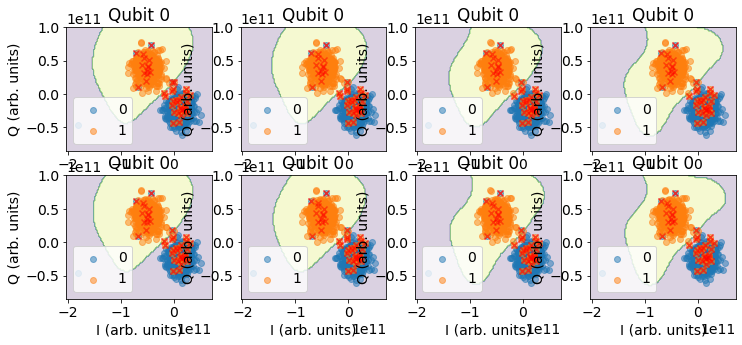

In [14]:
fig, ax = plt.subplots(2, len(discriminators) // 2, figsize=(12,5))

for i, dscr in enumerate(discriminators):
    dscr.plot(ax[i % 2, i // 2], flag_misclassified=True, show_boundary=True)

In [15]:
df_errors = pd.DataFrame([
    {"classifier": str(d._classifier), "C": d._classifier.C, "errors": len(misclassifications(d))}
    for d in discriminators
])
df_errors.sort_values("C", inplace=True)
df_errors

,classifier,C,errors
0,"SVC(C=1.0, cache_size=200, class_weight=None, ...",1.0,43
1,"SVC(C=1.5, cache_size=200, class_weight=None, ...",1.5,42
2,"SVC(C=3.0, cache_size=200, class_weight=None, ...",3.0,42
3,"SVC(C=5.0, cache_size=200, class_weight=None, ...",5.0,42
4,"SVC(C=10.0, cache_size=200, class_weight=None,...",10.0,41
5,"SVC(C=20.0, cache_size=200, class_weight=None,...",20.0,41
6,"SVC(C=30.0, cache_size=200, class_weight=None,...",30.0,41
7,"SVC(C=40.0, cache_size=200, class_weight=None,...",40.0,41


In [16]:
discriminators_linear = [
    LinearIQDiscriminator(result, [q], ['0', '1'])
#     for vals in [1,2,3]
#     (SVC(kernel="poly", degree = vals), result, [q], ['0', '1'])
#     for vals in [1,2,3]
]

In [17]:
discriminators_quad = [
    QuadraticIQDiscriminator(result, [q], ['0', '1'])
#     for vals in [1,2,3]
#     (SVC(kernel="poly", degree = vals), result, [q], ['0', '1'])
#     for vals in [1,2,3]
]

In [18]:
discriminators

In [19]:
type(discriminators_linear[0])

qiskit.ignis.measurement.discriminator.iq_discriminators.LinearIQDiscriminator

In [20]:
discriminators_quad

In [21]:
discriminators_comparison = discriminators_linear + discriminators_quad + [discriminators[-1]]
discriminators_comparison

In [22]:
len(discriminators_comparison)

3

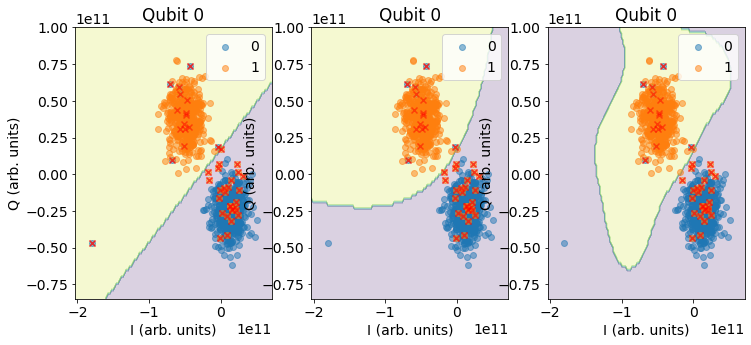

In [23]:
fig, ax = plt.subplots(1, len(discriminators_comparison) // 1, figsize=(12,5))

for i, dscr in enumerate(discriminators_comparison):
    dscr.plot(ax[i], flag_misclassified=True, show_boundary=True)

In [24]:
df_errors = pd.DataFrame([
    {"discriminator": d.__class__.__name__, "errors": len(misclassifications(d))}
    for d in discriminators_comparison
])
# df_errors.sort_values("C", inplace=True)
df_errors

,discriminator,errors
0,LinearIQDiscriminator,44
1,QuadraticIQDiscriminator,42
2,SklearnIQDiscriminator,41
